In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud

In [3]:
sns.set_style("darkgrid")

In [4]:
data=pd.read_csv("netflixtitles.csv")
df=pd.DataFrame(data)

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.shape

(7787, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

df.dropna(subset=['date_added','rating'], inplace=True)

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

now data set has no missing values

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed',dayfirst=False)
df.info()
#here we convert the datatype of date_added column

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


In [12]:
# now we have to create a two sep columns for year & month from date
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

from df.info() we can see that there is a type named colomn now we have to analze how the types are distributed into the table

In [13]:
df['type'].value_counts()

type
Movie      5372
TV Show    2398
Name: count, dtype: int64

Text(0.5, 1.0, 'Proportion of Movies vs. TV Shows')

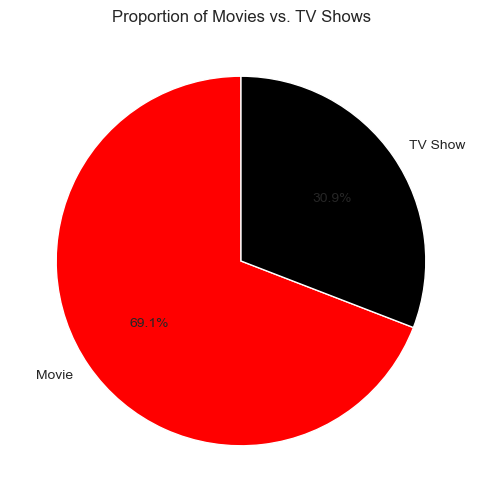

In [14]:
# now as from above we can plot the graph (pie chart ) for this
plt.figure(figsize=(8,6))
type_count=df['type'].value_counts()
plt.pie(type_count,labels=type_count.index,autopct='%1.1f%%',startangle=90,colors=['r','black'])
plt.title('Proportion of Movies vs. TV Shows')

<Figure size 1200x600 with 0 Axes>

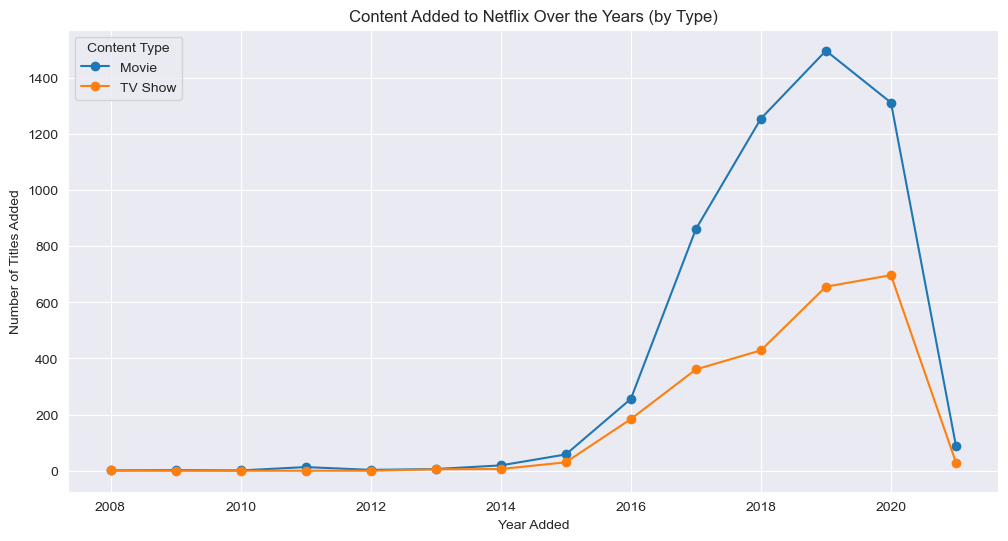

In [15]:
#as we created a two colomns year & month from this we have to analze...
#the trend of films & movies over time(years) 
# note that it is line plot

content= df.groupby(['year_added','type']).size().unstack().fillna(0)

plt.figure(figsize=(12,6))
content.plot(kind='line', marker = 'o', figsize=(12,6))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)

from this visualization we can say that there is highly increase in content of netfilx from year 2016 till 2019 then it significuntly goes down because of world is under lockdown

also the movies are more popular than tv shows

now we have to analyze the which type of content (i.e. Genre) are more famous

In [16]:

df['listed_in'].value_counts()

listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: 

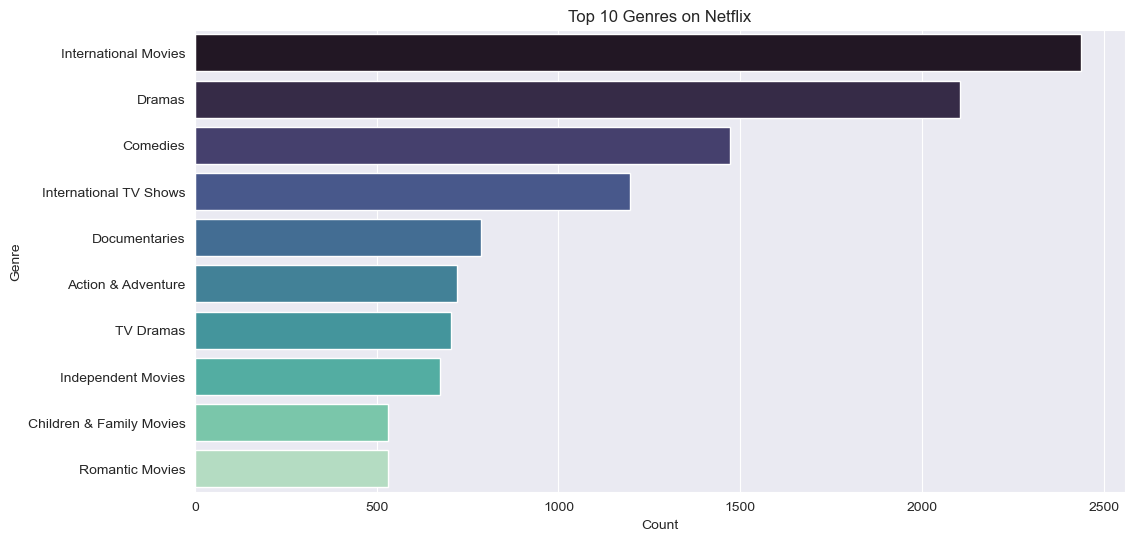

In [17]:
genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre','count']

#plot the geaph
top_genres_counts_plot = top_genres_counts.head(10)

plt.figure(figsize=(12,6))
sns.barplot(y='genre',x='count',data=top_genres_counts_plot,palette='mako',hue='genre',legend=False)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

so this are the top 10 Genres on netflix

now we are analyzing the distribution of duration of content

In [18]:
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(int)
tv_shows['seasons'] = tv_shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

Text(0.5, 1.0, 'TV Show Season Distribution')

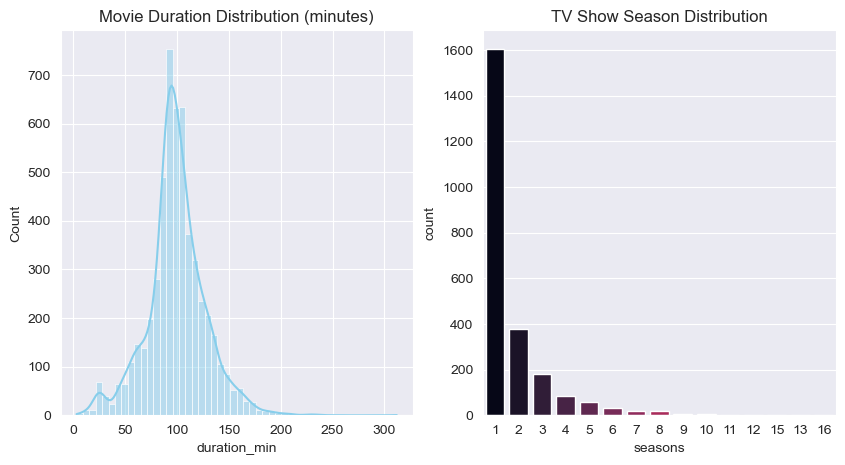

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows, palette='rocket', order=tv_shows['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

Insight:

* The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
* The vast majority of TV shows on Netflix are short-lived, with most having only 1 season.
* This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'TV-14'),
  Text(2, 0, 'TV-PG'),
  Text(3, 0, 'R'),
  Text(4, 0, 'PG-13'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'PG'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'NR'),
  Text(10, 0, 'G'),
  Text(11, 0, 'TV-Y7-FV'),
  Text(12, 0, 'UR'),
  Text(13, 0, 'NC-17')])

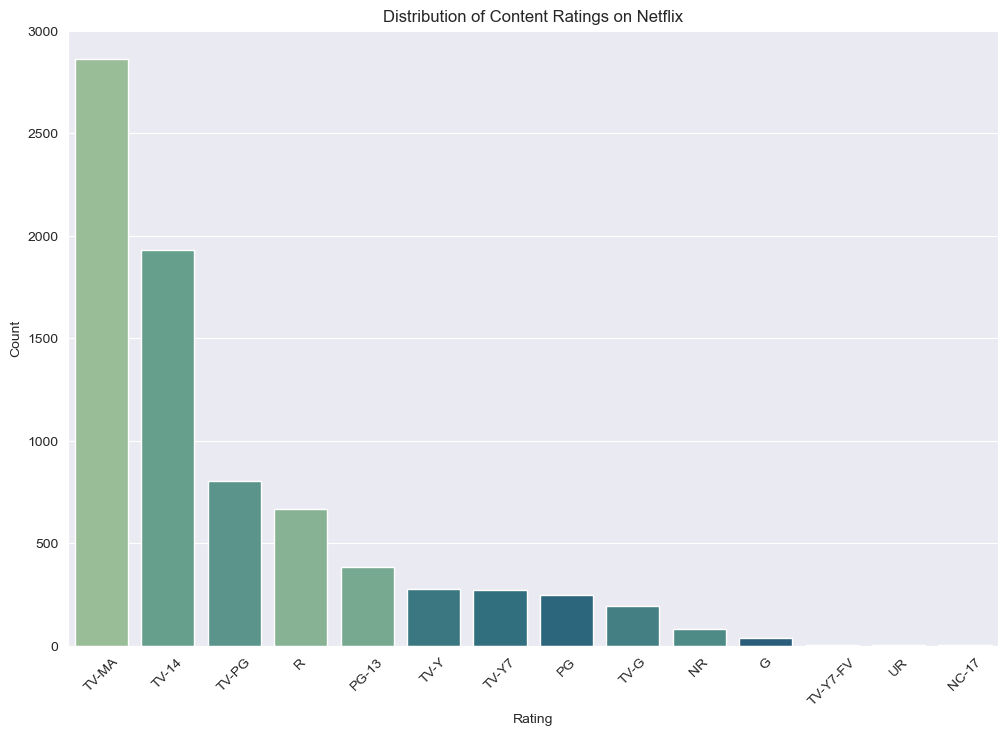

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)

Insight: 

* A large portion of Netflix's content is aimed at mature audiences, with TV-MA (Mature Audience) and TV-14 (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (TV-G, TV-Y).

Text(0, 0.5, 'Number of Titles')

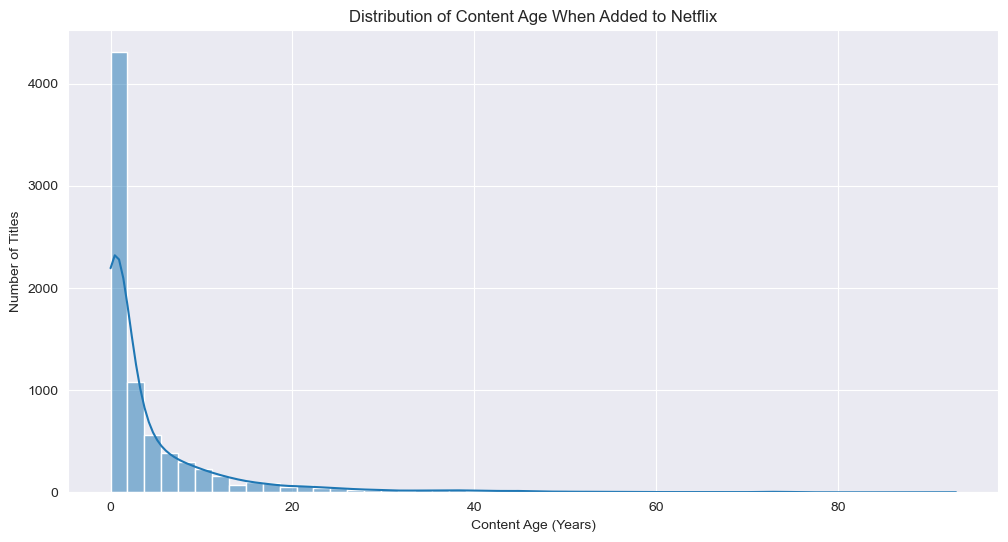

In [21]:
df['age_on_netflix'] = df['year_added'] - df['release_year']

content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(12, 6))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')

now we have to analyze the common word are used on netflix

Text(0.5, 1.0, 'Most Common Words in Netflix Content Descriptions')

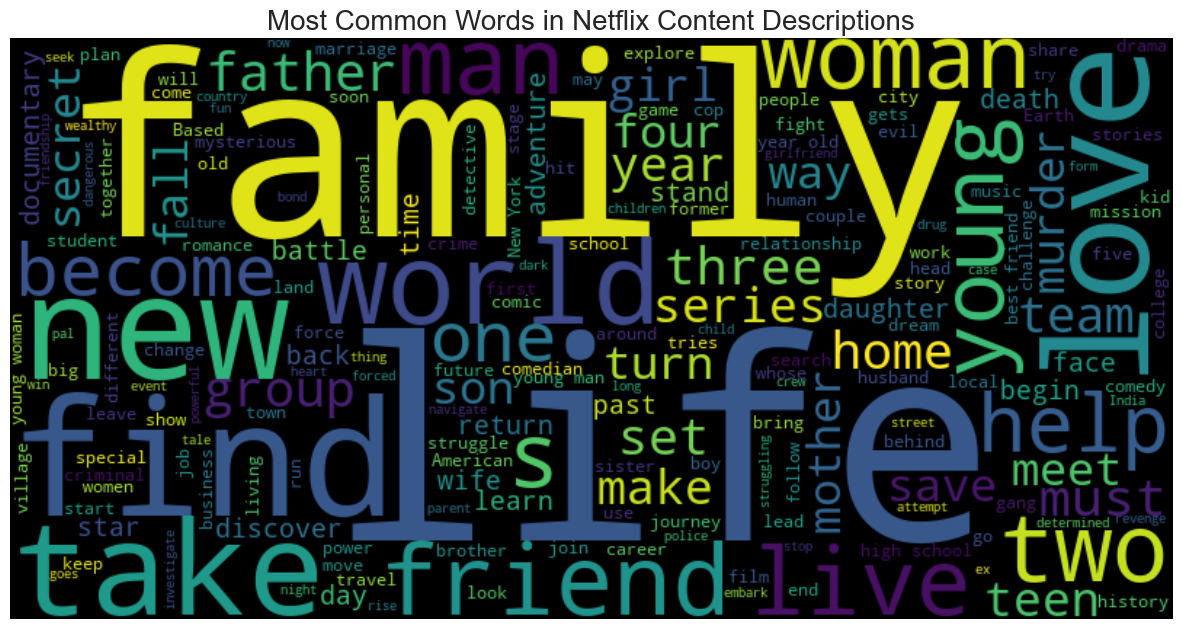

In [22]:
from wordcloud import WordCloud
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)

Submition Questions

Q1: How has the distribution of content ratings changed over time?

Ans:


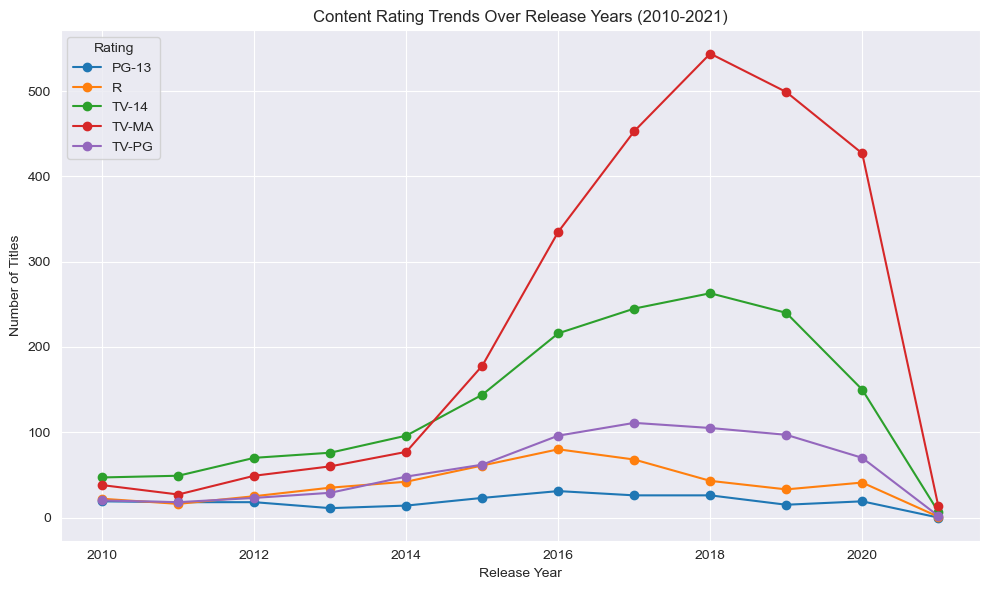

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


top_5_ratings = df['rating'].value_counts().head(5).index.tolist()
df_rating_trend = df[(df['rating'].isin(top_5_ratings)) & (df['release_year'] >= 2010)]
rating_pivot = df_rating_trend.groupby(['release_year', 'rating']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
rating_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Content Rating Trends Over Release Years (2010-2021)')
plt.ylabel('Number of Titles')
plt.xlabel('Release Year')
plt.legend(title='Rating', loc='upper left')
plt.tight_layout()
plt.show()

##### Analysis:
Since 2010, Netflix has pivoted heavily toward mature content. TV-MA (Mature Audiences) and TV-14 (Parents Strongly Cautioned) have become the most dominant ratings. 

The production of TV-MA content saw an exponential increase starting around 2015, which coincides with Netflix's global expansion and increased investment in original adult dramas and comedies.

2. Is there a relationship between content age and its type (Movie vs. TV Show)?

Text(0, 0.5, 'Years Since Release (from 2021)')

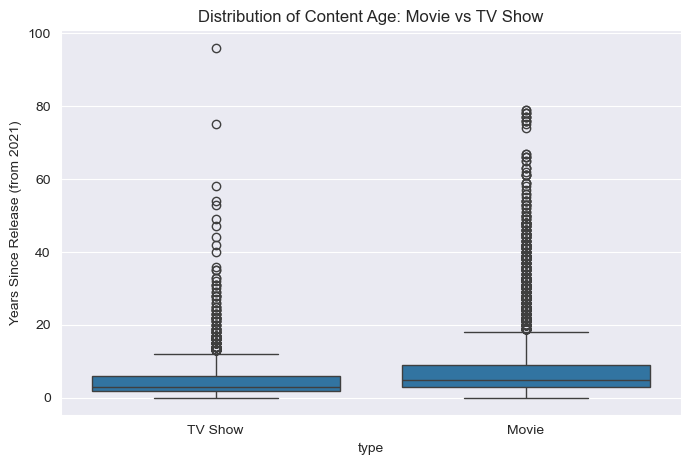

In [24]:
df['content_age'] = 2021 - df['release_year']
plt.figure(figsize=(8, 5))
sns.boxplot(x='type', y='content_age', data=df)
plt.title('Distribution of Content Age: Movie vs TV Show')
plt.ylabel('Years Since Release (from 2021)')

##### Analysis:
There is a clear distinction in age. TV Shows on Netflix are generally much "younger" (more recent) than Movies. Most TV Shows were released within the last 5 years of the dataset's timeframe. 

Movies, however, have a much wider age distribution, including a significant number of "older" titles (classics), making the average age of a movie on Netflix higher than that of a TV show.

3. Can we identify any trends in content production based on the release year vs. the year added to Netflix?

Text(0.5, 0, 'Year Added to Netflix')

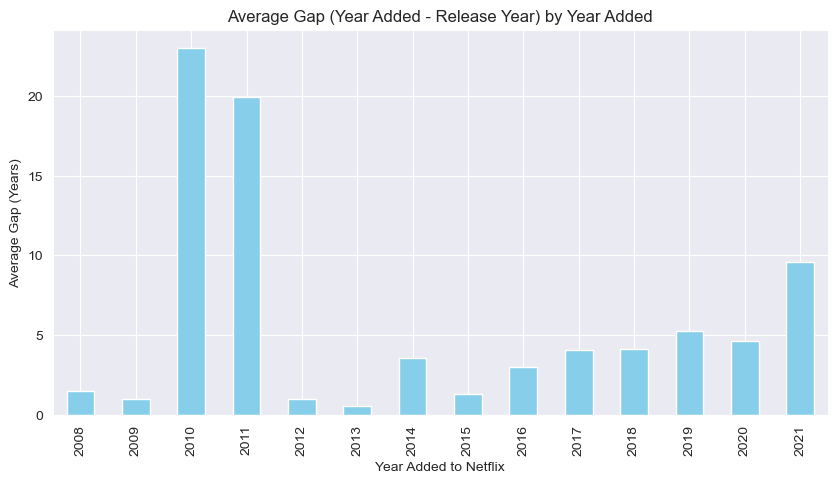

In [25]:
df['date_added_dt'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added_dt'].dt.year

# Filter out rows with missing year_added
df_valid = df.dropna(subset=['year_added']).copy()
df_valid['year_gap'] = df_valid['year_added'] - df_valid['release_year']

# Group by the year it arrived on Netflix to see the average 'age' of new arrivals
avg_gap = df_valid.groupby('year_added')['year_gap'].mean()

plt.figure(figsize=(10, 5))
avg_gap.plot(kind='bar', color='skyblue')
plt.title('Average Gap (Year Added - Release Year) by Year Added')
plt.ylabel('Average Gap (Years)')
plt.xlabel('Year Added to Netflix')

##### Analysis:

The "gap" (the time between a title's original release and when it arrives on Netflix) has decreased significantly.

In earlier years, the gap was large because Netflix primarily licensed older "library" content. Recently, the average gap has dropped toward zero because Netflix now focuses on Originals, where the release year and the "year added" are identical.

What are the most common word pairs or phrases in content descriptions?

In [35]:
import re
from collections import Counter

stop_words = set(["a", "an", "the", "and", "or", "but", "if", "at", "by", "for", "with", "in", "to", "is", "of", "on", "from"])

def get_top_bigrams(descriptions, n=10):
    all_bigrams = []
    for desc in descriptions:
        words = re.findall(r'\w+', str(desc).lower())
        filtered_words = [w for w in words if w not in stop_words]
        bigrams = list(zip(filtered_words, filtered_words[1:]))
        all_bigrams.extend(bigrams)
    return Counter(all_bigrams).most_common(n)
top_phrase_list = get_top_bigrams(df['description'].dropna())

Text(0.5, 1.0, 'Most Common Pairs & Phrases in Netflix Content Descriptions')

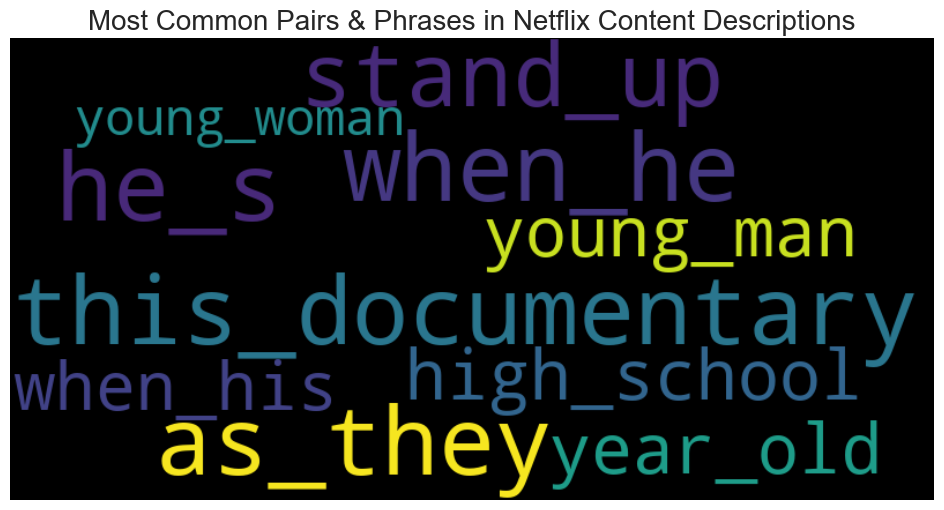

In [37]:
from wordcloud import WordCloud
clean_list = []
for item in top_phrase_list:
    words = item[0] if isinstance(item[0], (tuple, list)) else item
    clean_list.append('_'.join(words))

text = ' '.join(clean_list)

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Pairs & Phrases in Netflix Content Descriptions', fontsize=20)

##### Analysis:
The most common word pairs reveal recurring themes and tropes. Phrases like "this documentary" and "high school" appear frequently, showing the prevalence of these specific genres and settings. Common bigrams include:

this documentary (205)

group of (174)

high school (133)

year old (130)

5. Who are the top directors on Netflix?

In [39]:
directors_list = df['director'].dropna().str.split(', ')
all_directors = [director.strip() for sublist in directors_list for director in sublist]
top_directors = Counter(all_directors).most_common(10)

Text(0.5, 1.0, 'top directors Of Netflix')

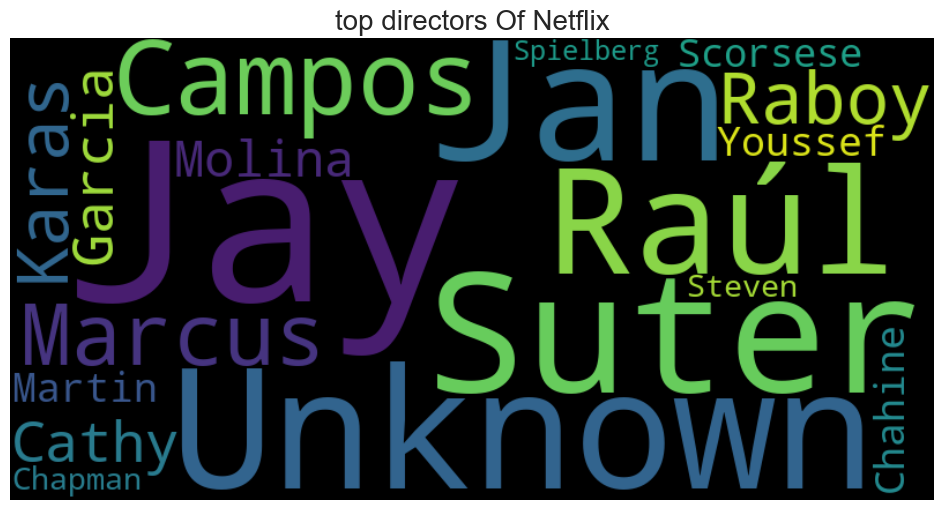

In [42]:
clean_list = []
for item in top_directors:
    if isinstance(item[0], (tuple, list)):
        words = item[0]
    else:
        words = item[:-1]
    clean_list.append('_'.join(map(str, words)))
text = ' '.join(clean_list)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('top directors Of Netflix', fontsize=20)

The top directors are often those who work on high-volume content like stand-up specials or long-running international film series.

Jan Suter and Raúl Campos top the list, largely due to their prolific work directing comedy specials across Latin America.